<a href="https://colab.research.google.com/github/MMAMAR/stage-/blob/master/SSTtoSSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netcdf4

     |████████████████████████████████| 4.1MB 3.4MB/s 
     |████████████████████████████████| 337kB 48.2MB/s 


In [2]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.feature_extraction import image
from netCDF4 import Dataset
import numpy.ma as ma

In [4]:
os.chdir('/content/drive/My Drive/')
!pwd
!ls /content/drive/My\ Drive/CMEMSData

/content/drive/My Drive
global-analysis-forecast-phy-001-024-201810.nc
global-analysis-forecast-phy-001-024-201811.nc
global-analysis-forecast-phy-001-024-201812.nc
global-analysis-forecast-phy-001-024-201901.nc
global-analysis-forecast-phy-001-024-201902.nc
global-analysis-forecast-phy-001-024-201903.nc
global-analysis-forecast-phy-001-024-201904.nc


In [5]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
Maskes=[]
train_files=['global-analysis-forecast-phy-001-024-201812.nc','global-analysis-forecast-phy-001-024-201902.nc']
test_files=['global-analysis-forecast-phy-001-024-201901.nc']

# trainning data

for f in train_files:
  nc_data     = Dataset('./CMEMSData/'+f,'r')
  ssh = nc_data['zos'][:,:,:]
  sst = nc_data['thetao'][:,0,:,:]
  for i in range(len(sst)):
    X=np.flipud(sst[i,:,:]).data
    Y=np.flipud(ssh[i,:,:]).data
    XY_mask=np.flipud(ssh[i,:,:]).mask
    X_patches=image.extract_patches_2d(X, (50, 50), max_patches= 100, random_state=0)
    Y_patches=image.extract_patches_2d(Y, (50, 50), max_patches= 100, random_state=0)
    Mask_patches=image.extract_patches_2d(XY_mask, (50, 50), max_patches= 100, random_state=0)

    for j in range(len(X_patches)):
      X_train.append(X_patches[j])
      Y_train.append(Y_patches[j])
      Maskes.append(Mask_patches[j])

x_train=[]
y_train=[]

for i in range(len(X_train)):
  if np.sum(Maskes[i]==True)==0:
    x_train.append(X_train[i])
    y_train.append(Y_train[i])

print(len(x_train))
print(len(y_train))

#test data

Maskes=[]
for f in test_files:
  nc_data     = Dataset('./CMEMSData/'+f,'r')
  ssh = nc_data['zos'][:,:,:]
  sst = nc_data['thetao'][:,0,:,:]
  for i in range(len(sst)):
    X=np.flipud(sst[i,:,:]).data
    Y=np.flipud(ssh[i,:,:]).data
    XY_mask=np.flipud(ssh[i,:,:]).mask
    X_patches=image.extract_patches_2d(X, (50, 50), max_patches= 100, random_state=0)
    Y_patches=image.extract_patches_2d(Y, (50, 50), max_patches= 100, random_state=0)
    Mask_patches=image.extract_patches_2d(XY_mask, (50, 50), max_patches= 100, random_state=0)

    for j in range(len(X_patches)):
      X_test.append(X_patches[j])
      Y_test.append(Y_patches[j])
      Maskes.append(Mask_patches[j])

x_test=[]
y_test=[]

for i in range(len(X_test)):
  if np.sum(Maskes[i]==True)==0:
    x_test.append(X_test[i])
    y_test.append(Y_test[i])

print(len(x_test))
print(len(y_test))
X=[x_train,x_test]
Y=[y_train,y_test]
Mx1=np.array([np.mean(x) for x in x_train]).mean()
My1=np.array([np.mean(y) for y in y_train]).mean()
Mx2=np.array([np.mean(x) for x in x_test]).mean()
My2=np.array([np.mean(y) for y in y_test]).mean()
print(Mx1)
print(My1)
print(Mx2)
print(My2)

#Moyenne non spacialisée

x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

x_train=x_train-Mx1
y_train=y_train-My1
x_test=x_test-Mx2
y_test=y_test-My2

x_train,y_train=shuffle(x_train,y_train, random_state=0)
x_test,y_test=shuffle(x_test,y_test, random_state=0)

x_train=torch.Tensor(x_train)
y_train=torch.Tensor(y_train)
x_test=torch.Tensor(x_test)
y_test=torch.Tensor(y_test)

5605
5605
2945
2945
15.594807103916969
0.0060345840484668225
15.615132012611205
0.02577029756980937


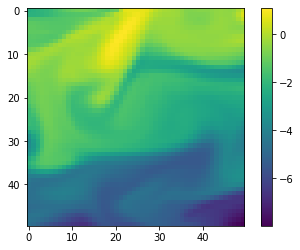

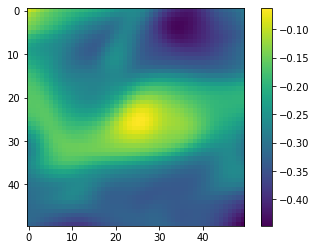

In [6]:
plt.figure()
plt.imshow(ma.masked_array(x_test[1],mask=np.zeros((50,50))))
plt.colorbar()

plt.figure()
plt.imshow(ma.masked_array(y_test[1],mask=np.zeros((50,50))))
plt.colorbar()

## Building teh Model 


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3,padding= (1,1))
        self.conv2 = nn.Conv2d(64, 64, 3,padding= (1,1))
        self.conv3 = nn.Conv2d(64, 1, 3,padding= (1,1))
    
    def forward(self, x):
      x=F.relu(self.conv1(x))
      x=F.relu(self.conv2(x))
      x=self.conv3(x)

      return(x)
net= Net()

In [0]:
lossfunction=nn.MSELoss()
optimizer=optim.Adam(net.parameters(), lr=0.00001)


In [45]:
epochs= 20
batch_size= 1000

for i in range(epochs):
  #running_loss=0 
  x_train,y_train=shuffle(x_train,y_train, random_state=0)
  x_train,y_train=shuffle(x_train,y_train, random_state=0)
  for j in range(0,len(x_train), batch_size):
    X = x_train[j:j+batch_size].view(-1, 1, 50, 50)
    Y = y_train[j:j+batch_size].view(-1, 1, 50, 50)
    optimizer.zero_grad()
    outputs = net(X)
    loss = lossfunction(outputs, Y)
    loss.backward()
    optimizer.step()
    #running_loss+=loss.item()

    if j==5000:
      print("epoch=",i,"; running_loss=", loss.item())
       


epoch= 0 ; running_loss= 0.20672181248664856
epoch= 1 ; running_loss= 0.1621646285057068
epoch= 2 ; running_loss= 0.12692388892173767
epoch= 3 ; running_loss= 0.09962140768766403
epoch= 4 ; running_loss= 0.08618023991584778
epoch= 5 ; running_loss= 0.08062721788883209
epoch= 6 ; running_loss= 0.07345497608184814
epoch= 7 ; running_loss= 0.0686408132314682
epoch= 8 ; running_loss= 0.062016136944293976
epoch= 9 ; running_loss= 0.06214370205998421
epoch= 10 ; running_loss= 0.0701402947306633
epoch= 11 ; running_loss= 0.06331358104944229
epoch= 12 ; running_loss= 0.05961497500538826
epoch= 13 ; running_loss= 0.062404830008745193
epoch= 14 ; running_loss= 0.06232231855392456
epoch= 15 ; running_loss= 0.061581168323755264
epoch= 16 ; running_loss= 0.0580265037715435
epoch= 17 ; running_loss= 0.059470176696777344
epoch= 18 ; running_loss= 0.058483704924583435
epoch= 19 ; running_loss= 0.05954792723059654


In [0]:
outputs=net.forward(x_test.view(-1, 1, 50, 50))

In [0]:
outputs=outputs.view(-1,50,50)

tensor(0.0089)


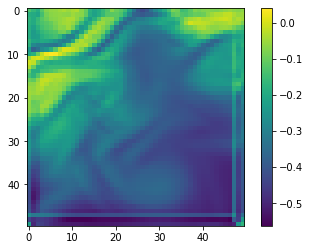

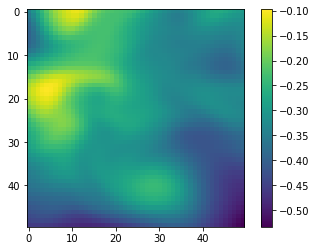

In [48]:
i=9
plt.figure()
plt.imshow(ma.masked_array(outputs[i].data,mask=np.zeros((50,50))))
plt.colorbar()

plt.figure()
plt.imshow(ma.masked_array(y_test[i],mask=np.zeros((50,50))))
plt.colorbar()

loss_fn = nn.MSELoss()
MSE=loss_fn(outputs[i].data,y_test[i])
print(MSE)


In [49]:

MSE=loss_fn(outputs.data,y_test)
eff=1-MSE/y_test.var()
print("efficience: ", float(eff.data))

efficience:  0.7202023267745972


## Evaluation par le laplacien 


In [55]:
from scipy.sparse import csgraph

output_laplacian= []
test_laplacian= []
for i in range(len(y_test)):
  output_laplacian.append(csgraph.laplacian(outputs.data[i]))
  test_laplacian.append(csgraph.laplacian(y_test[i]))
output_laplacian= torch.Tensor(output_laplacian)
test_laplacian= torch.Tensor(test_laplacian)


MSE=loss_fn(output_laplacian, test_laplacian)
eff=1-MSE/test_laplacian.var()
print("lapalacian_efficience: ", float(eff))

lapalacian_efficience:  0.834850549697876
